In [2]:
import numpy as np
import random as r
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib notebook
# %matplotlib
r.seed(0)
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd

In [3]:
boston_data = load_boston()
print(boston_data.keys())
print(boston_data['DESCR'])

dict_keys(['feature_names', 'data', 'DESCR', 'target'])
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,0

In [4]:
df = pd.DataFrame(boston_data['data'], columns=boston_data['feature_names'])

In [5]:
df_descr = df.describe()
print(df_descr)

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

<IPython.core.display.Javascript object>


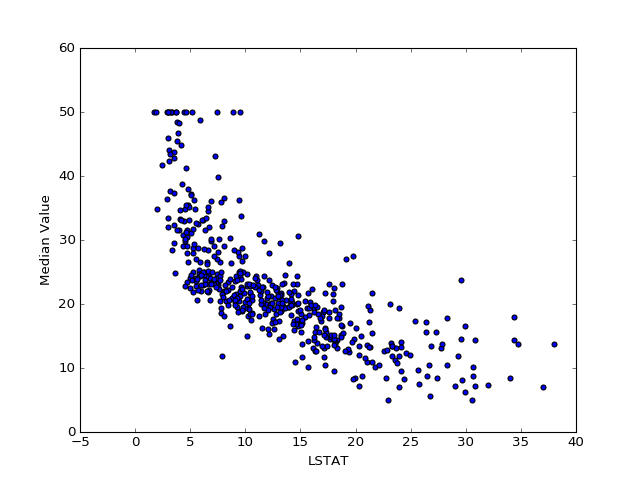

In [6]:
fig = plt.figure()
plt.scatter(df['LSTAT'], boston_data['target'])
plt.xlabel('LSTAT')
plt.ylabel('Median Value')
plt.show()

In [7]:
clf = LinearRegression()
x_feature = 'CRIM'
y_feature = 'RM'

X = df[[x_feature, y_feature]].values
feat = PolynomialFeatures(degree=1)

X_poly = feat.fit_transform(X)
print(X_poly.shape)
y = boston_data['target']

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.1, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
# print(mean_squared_error(y_test, clf.predict(X_test)))

(506, 3)
0.532416133156
0.622899399724


<IPython.core.display.Javascript object>


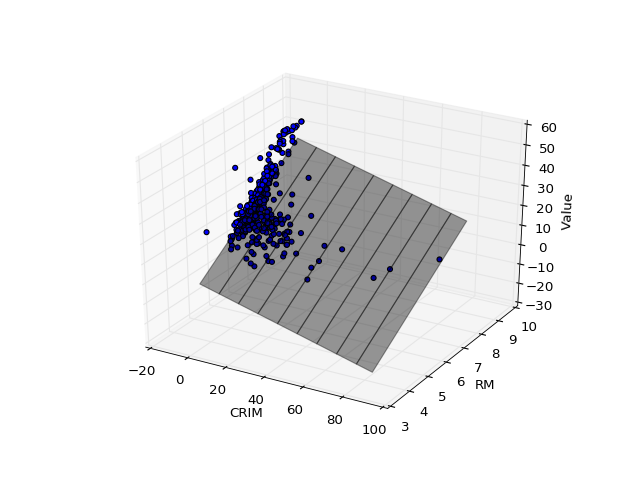

(534, 3)


In [8]:
fig = plt.figure()

x_surf = np.arange(df_descr[x_feature]['min'], df_descr[x_feature]['max'], 1)
y_surf = np.arange(df_descr[y_feature]['min'], df_descr[y_feature]['max'], 1)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

data = np.hstack((x_surf.reshape(-1, 1), y_surf.reshape(-1, 1)))
data = feat.fit_transform(data)
norm_data = scaler.transform(data)

print(norm_data.shape)
pred = clf.predict(norm_data)

ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[x_feature], df[y_feature], y, marker='o',
           alpha=1)
ax.set_xlabel(x_feature)
ax.set_ylabel(y_feature)
ax.set_zlabel('Value')

ax.plot_surface(x_surf, y_surf,
                pred.reshape(x_surf.shape), color='None',
                alpha = 0.4)
plt.show()